# Style vectorsをDBSCANで作る

こっちのほうが全部を無理やりクラスタに押し込まずに済むので、特徴がよく出てよいかもしれない。

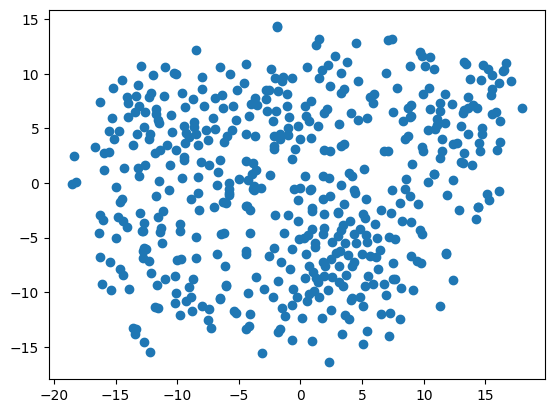

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model_name = "Liisa2"


tsne = TSNE(n_components=2, random_state=42, metric="cosine")

wavs_dir = os.path.join("Data", model_name, "wavs")
style_vector_files = [
    os.path.join(wavs_dir, f) for f in os.listdir(wavs_dir) if f.endswith(".npy")
]
wav_files = [f.replace(".npy", "") for f in style_vector_files]
style_vectors = [np.load(f) for f in style_vector_files]
x = np.array(style_vectors)
mean = np.mean(x, axis=0)

x_tsne = tsne.fit_transform(x)

# plt.figure(figsize=(6, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1])
plt.show()

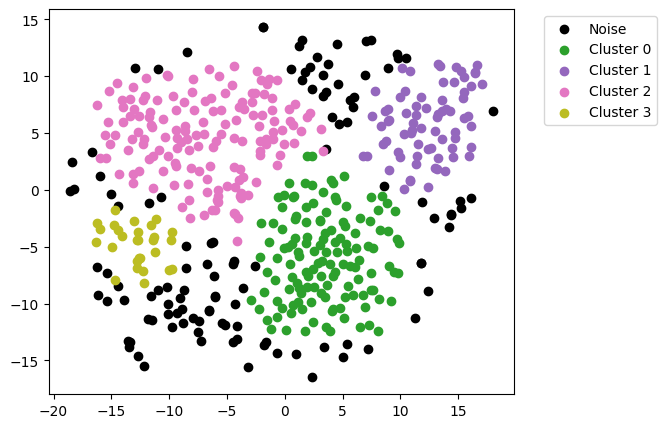

In [23]:
# TSNEで可視化
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN

# ここの2つの数値をいじる（スタイル数は事前指定できない！）
eps = 2.6
min_samples = 15

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

cluster_assignments = dbscan.fit_predict(x_tsne)

cmap = matplotlib.colormaps["tab20"]

fig, ax = plt.subplots(figsize=(6, 5))
n_clusters = max(cluster_assignments) + 1
for cluster_id in range(-1, n_clusters):
    cluster_points = x_tsne[cluster_assignments == cluster_id]
    if cluster_id == -1:
        label = "Noise"
        color = "black"
    else:
        label = f"Cluster {cluster_id}"
        color = cmap((cluster_id + 1) / (n_clusters + 1))
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=label, color=color)

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [24]:
centroids = []
for i in range(n_clusters):
    centroids.append(x[cluster_assignments == i].mean(axis=0))

In [ ]:
from scipy.spatial.distance import cdist
from IPython.display import Audio, display

# 再生するファイルの数を指定
number_of_files_to_play = 3

# 各クラスターのセントロイドに最も近い点に対応するファイル名を取得
for center_idx in range(len(centroids)):
    # セントロイドと全ての点との距離を計算
    distances = cdist(centroids[center_idx : center_idx + 1], x)
    # 距離が小さい順にソートし、上位のインデックスを取得
    closest_indices = np.argsort(distances[0])[:number_of_files_to_play]

    # クラスターごとに音声ファイルを再生
    print(f"Cluster {center_idx}:")
    for idx in closest_indices:
        display(Audio(wav_files[idx]))

In [29]:
style_vectors = [mean] + centroids
style_vectors = np.array(style_vectors)
np.save(os.path.join("model_assets", model_name, "style_vectors.npy"), style_vectors)